<a href="https://colab.research.google.com/github/GSelvakumar/ml/blob/main/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

problem is to find the diagnosis in breast tissue is malignant or not

In [ ]:
#import the tensorflow package

import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
#load in the data
from sklearn.datasets import load_breast_cancer

#load the data
data = load_breast_cancer()

#check the type of data
type(data)

sklearn.utils.Bunch

It is a **Bunch** object, so this basically acts like a dictionary where you can treat the keys like attributes.

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# 'data' (the attribute not the variable) means the input data
data.data.shape

(569, 30)

It has **569 samples** and **30 features** which means 569 rows and 30 columns.

In [7]:
data.target
#note how the targets are just 0s and 1s. Normally, when you have K targets, they are just labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
#their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape
#there are 569 corresponding targets

(569,)

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets
#this let us simulate how our model will perform in the future

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

The basic idea behind this is that because the output is a linear combination of the input you don't want one input to have a very large range say one million and another input to have a very small range like say 0.001 If this happens then the weight will be too sensitive when the input has a large range and not sensitive enough when the input has a small range. So the typical way to deal with this is a normalization or standardization. Basically this just means subtracting the mean and dividing by the standard deviation. Luckly sklearn already comes with this function as StandardScalar(). 

So we fit transform on X train and then we transform on X test

In [16]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

#Alternative method
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model
r = model.fit(X_train, Y_train, validation_data =(X_test, Y_test), epochs=100)

#evaluate the model - evaluate() returns loss and accuracy
print("Train score: ", model.evaluate(X_train, Y_train))
print("Test score: ", model.evaluate(X_test, Y_test))

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 0.5804 - accuracy: 0.7313 - val_loss: 0.6126 - val_accuracy: 0.7021
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5471 - accuracy: 0.7585 - val_loss: 0.5606 - val_accuracy: 0.7340
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4735 - accuracy: 0.8205 - val_loss: 0.5168 - val_accuracy: 0.7713
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8294 - val_loss: 0.4791 - val_accuracy: 0.8032
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4014 - accuracy: 0.8488 - val_loss: 0.4475 - val_accuracy: 0.8298
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4027 - accuracy: 0.8712 - val_loss: 0.4196 - val_accuracy: 0.8404
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3436 - accuracy: 0.8971 - val_loss: 0.3953 - val_accuracy: 0.8617
Epoch 8/100


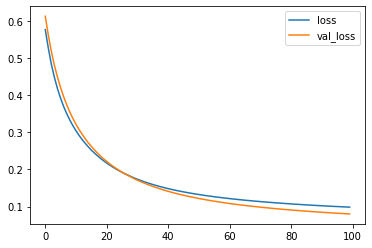

In [19]:
#plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

training loss is stored in a key called loss while the validation loss is stored in the key val_loss

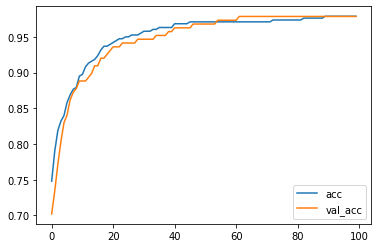

In [20]:
#plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

key accuracy = acc
value accuracy = val_accuracy